In [1]:
import sys
sys.path.append('..')

from src.models.baseline_models import BaselineModels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (238, 13)
Test set: (61, 13)


In [2]:
# Initialize baseline models
baseline = BaselineModels(random_state=42)

# Train all models
baseline.train_all(X_train, y_train)

TRAINING BASELINE MODELS

Training Logistic Regression...
✓ Logistic Regression trained

Training Decision Tree...
✓ Decision Tree trained

Training Random Forest...
✓ Random Forest trained

Training SVM...
✓ SVM trained

Training Naive Bayes...
✓ Naive Bayes trained


In [3]:
# Evaluate all models
results = baseline.evaluate_all(X_test, y_test)


EVALUATING MODELS

Logistic Regression:
  accuracy: 0.8361
  precision: 0.7812
  recall: 0.8929
  f1_score: 0.8333
  roc_auc: 0.9459

Decision Tree:
  accuracy: 0.6557
  precision: 0.6000
  recall: 0.7500
  f1_score: 0.6667
  roc_auc: 0.6629

Random Forest:
  accuracy: 0.8689
  precision: 0.8125
  recall: 0.9286
  f1_score: 0.8667
  roc_auc: 0.9410

SVM:
  accuracy: 0.8033
  precision: 0.7500
  recall: 0.8571
  f1_score: 0.8000
  roc_auc: 0.9123

Naive Bayes:
  accuracy: 0.8525
  precision: 0.7879
  recall: 0.9286
  f1_score: 0.8525
  roc_auc: 0.9481


In [5]:
# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df)

# Find best model
best_model = results_df['accuracy'].idxmax()
print(f"\n Best Model: {best_model}")
print(f"   Accuracy: {results_df.loc[best_model, 'accuracy']:.4f}")
print(f"   ROC-AUC: {results_df.loc[best_model, 'roc_auc']:.4f}")


MODEL COMPARISON SUMMARY
                     accuracy  precision  recall  f1_score  roc_auc
Logistic Regression    0.8361     0.7812  0.8929    0.8333   0.9459
Decision Tree          0.6557     0.6000  0.7500    0.6667   0.6629
Random Forest          0.8689     0.8125  0.9286    0.8667   0.9410
SVM                    0.8033     0.7500  0.8571    0.8000   0.9123
Naive Bayes            0.8525     0.7879  0.9286    0.8525   0.9481

 Best Model: Random Forest
   Accuracy: 0.8689
   ROC-AUC: 0.9410


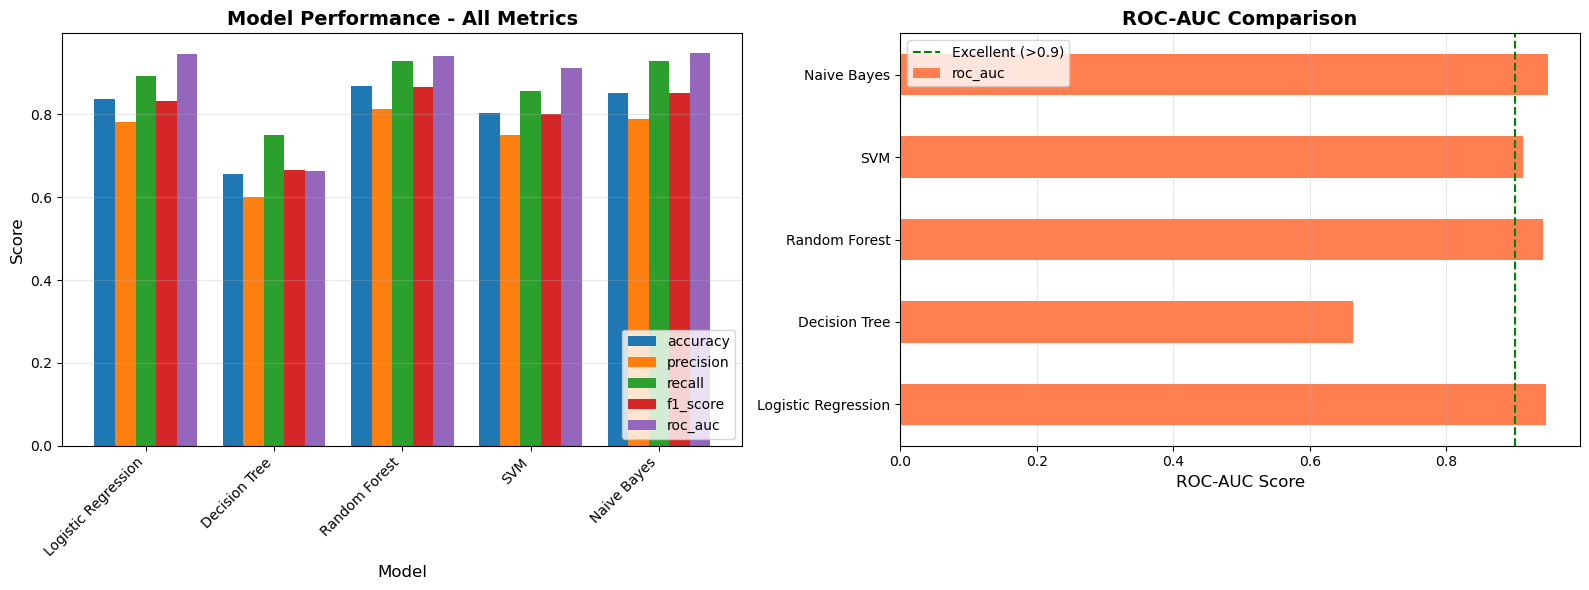

In [6]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All metrics comparison
results_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Model Performance - All Metrics', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: ROC-AUC comparison
results_df['roc_auc'].plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[1].axvline(x=0.9, color='green', linestyle='--', label='Excellent (>0.9)')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Save baseline models
baseline.save_models(filepath='../results/models/baseline_models.pkl')

print("\n✓ All baseline models completed and saved!")


✓ Models saved to ../results/models/baseline_models.pkl

✓ All baseline models completed and saved!
